In [6]:
%pip install -r requirements.txt

  Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached zipp-3.21.0-py3-none-any.whl.metadata (3.7 kB)
Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl (2.8 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached matplotlib-3.9.3-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 31.4 MB/s eta 0:00:00
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3

In [41]:
import pandas as pd
cr = pd.read_excel("data/customer_rating.xlsx")


In [42]:
# clean code and prepare 
# convert to date time format
cr["TIMESTAMP"] = pd.to_datetime(cr["TIMESTAMP"], unit="s")
print(cr[["TIMESTAMP"]].head()) #check

# we fill all NAs in cr["ISSUE_RESOLVED_ENUM"] with Unknown
print(cr.isnull().sum())
cr["ISSUE_RESOLVED_ENUM"] = cr["ISSUE_RESOLVED_ENUM"].fillna("Unknown") # keine notwendigkeit aber kann spaeter hilfreich sein
#non null data


cr = cr.dropna() #to double check
print(cr.isnull().sum())

   TIMESTAMP
0 2023-01-26
1 2023-01-27
2 2023-01-27
3 2023-01-24
4 2023-01-25
TIMESTAMP                 0
ISSUE_RESOLVED_ENUM    4668
SURVEY_TYPE               0
FIXED_YN                  0
INTERNET_YN               0
MOBILE_YN                 0
TV_YN                     0
REGION                    0
CUSTOMER_SCORE            0
dtype: int64
TIMESTAMP              0
ISSUE_RESOLVED_ENUM    0
SURVEY_TYPE            0
FIXED_YN               0
INTERNET_YN            0
MOBILE_YN              0
TV_YN                  0
REGION                 0
CUSTOMER_SCORE         0
dtype: int64


In [43]:

print(cr.head())
print(cr.shape) #just some descriptive statistics to check
print(cr.info())
print(cr.describe())

   TIMESTAMP ISSUE_RESOLVED_ENUM SURVEY_TYPE FIXED_YN INTERNET_YN MOBILE_YN  \
0 2023-01-26        Not resolved       EMAIL       No          No       Yes   
1 2023-01-27        Not resolved       EMAIL      Yes         Yes        No   
2 2023-01-27        Not resolved       EMAIL       No         Yes       Yes   
3 2023-01-24        Not resolved       EMAIL      Yes         Yes        No   
4 2023-01-25        Not resolved  SMS-TO-SMS       No          No       Yes   

  TV_YN           REGION  CUSTOMER_SCORE  
0    No   Klein-Pöchlarn               0  
1   Yes  WIENER NEUSTADT               0  
2    No     Lichtenwörth               1  
3   Yes             Wien               1  
4    No             Wien               3  
(15407, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15407 entries, 0 to 15406
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TIMESTAMP            15407 no

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

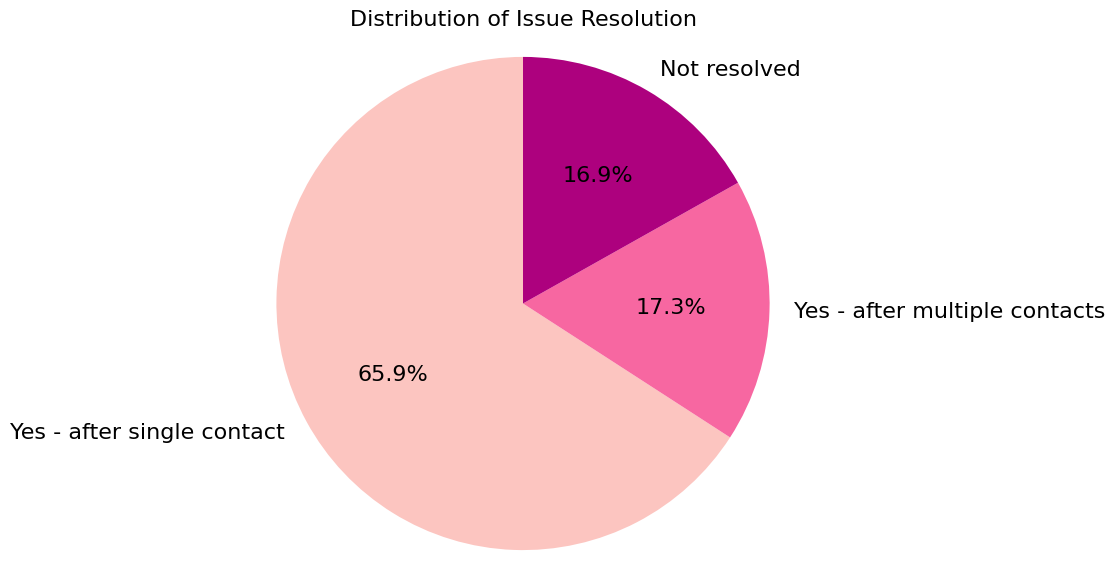

Average Customer Score: 5.03


In [16]:
ant = cr["ISSUE_RESOLVED_ENUM"].value_counts(normalize=True) * 100

colors = sns.color_palette("RdPu", n_colors=len(ant))

plt.figure(figsize=(7, 7))
plt.pie(ant, labels=ant.index, autopct='%1.1f%%', startangle=90, colors=colors,  textprops={'fontsize': 16})
plt.title("Distribution of Issue Resolution", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the survey details
anz_surv = len(cr)
avg_score = cr["CUSTOMER_SCORE"].mean()

print(f"Average Customer Score: {avg_score:.2f}")

avg customer score per survey type

In [17]:
survey_avg = cr.groupby("SURVEY_TYPE")["CUSTOMER_SCORE"].mean()


print(survey_avg)

survey_avg = cr.groupby("SURVEY_TYPE")["CUSTOMER_SCORE"].mean()

survey_count = cr.groupby("SURVEY_TYPE")["CUSTOMER_SCORE"].size()

survey_summary = pd.DataFrame({
    "Average Customer Score": survey_avg,
    "Count": survey_count
})

print(survey_summary)


SURVEY_TYPE
EMAIL         5.040040
SMS-TO-SMS    5.015424
SMS-TO-WEB    5.153439
Name: CUSTOMER_SCORE, dtype: float64
             Average Customer Score  Count
SURVEY_TYPE                               
EMAIL                      5.040040  10939
SMS-TO-SMS                 5.015424   4279
SMS-TO-WEB                 5.153439    189


highest score

In [44]:
#cr['TIMESTAMP'] = cr['TIMESTAMP'].dt.date
date_sc = cr.groupby('TIMESTAMP')['CUSTOMER_SCORE'].mean() #we get the time and we do not need it


# Find the date with the highest average score
max_date = date_sc.idxmax() 
max_value = date_sc.max()

# Find the date with the lowest average score
min_date = date_sc.idxmin()
min_value = date_sc.min()

# Display the results
print(f"Highest Average Score: {max_value:.2f} on {max_date}")
print(f"Lowest Average Score: {min_value:.2f} on {min_date}")

Highest Average Score: 5.47 on 2023-01-08 00:00:00
Lowest Average Score: 4.69 on 2023-01-09 00:00:00


most submissions

In [ ]:

cr["TIMESTAMP"] = pd.to_datetime(cr["TIMESTAMP"]).dt.date  

cr["Weekday"] = pd.to_datetime(cr["TIMESTAMP"]).dt.weekday

week_counts = cr["Weekday"].value_counts().sort_index()


week_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
week_counts.index = week_counts.index.map(week_names)

# Step 4: Find the weekday with the highest number of submissions
most_weekday = week_counts.idxmax()
most_count = week_counts.max()
total_s = len(cr)
fraction = most_count / total_s

print(f"The weekday {most_weekday} with {most_count}")

print(f"The fraction {most_weekday}: {fraction:.4f}")

The weekday Monday with 3178
The fractionMonday: 0.2063


# average products owned per customer score

In [51]:
product_columns = [col for col in cr.columns if col.endswith("YN")]
product_columns

['FIXED_YN', 'INTERNET_YN', 'MOBILE_YN', 'TV_YN']

In [52]:
melted = cr.melt(
    id_vars=["CUSTOMER_SCORE"],  
    value_vars=product_columns,  
    var_name="Product_Type",     
    value_name="Has_Product"  
)

filtered = melted[melted["Has_Product"] == "Yes"]
filtered
result = (
    filtered.groupby("Product_Type")["CUSTOMER_SCORE"]
    .mean()
    .reset_index()
    .rename(columns={"CUSTOMER_SCORE": "Average_Score"})
)

print(result)

  Product_Type  Average_Score
0     FIXED_YN       5.028353
1  INTERNET_YN       5.025244
2    MOBILE_YN       5.047729
3        TV_YN       5.056252


In [23]:

cr[product_columns] = cr[product_columns].replace({'Yes': 1, 'No': 0})
cr['TOTAL_PRODUCTS'] = cr[product_columns].sum(axis=1)

/var/folders/hz/1yspsh5535q6skwbqf7lymqw0000gn/T/ipykernel_33960/3210569522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cr[product_columns] = cr[product_columns].replace({'Yes': 1, 'No': 0})


In [24]:
avg_p_score = cr.groupby("CUSTOMER_SCORE")['TOTAL_PRODUCTS'].mean().reset_index()
print(avg_p_score)

    CUSTOMER_SCORE  TOTAL_PRODUCTS
0                0        1.577165
1                1        1.599240
2                2        1.563904
3                3        1.585207
4                4        1.617722
5                5        1.581783
6                6        1.604930
7                7        1.559539
8                8        1.578446
9                9        1.592421
10              10        1.604795


/var/folders/hz/1yspsh5535q6skwbqf7lymqw0000gn/T/ipykernel_33960/681279399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_p_score, x="CUSTOMER_SCORE", y='TOTAL_PRODUCTS', palette='RdPu')


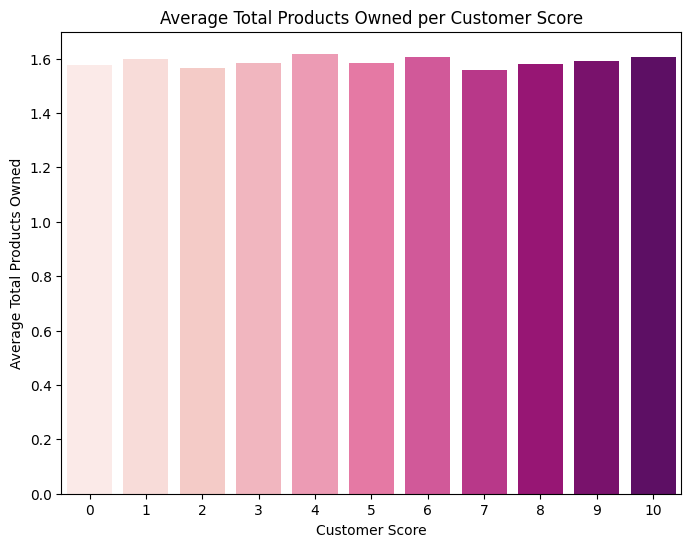

 avg Products Owned: 1.59


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_p_score, x="CUSTOMER_SCORE", y='TOTAL_PRODUCTS', palette='RdPu')
plt.title("Average Total Products Owned per Customer Score")
plt.xlabel("Customer Score")
plt.ylabel("Average Total Products Owned")
plt.show()
overall_avg_products = cr['TOTAL_PRODUCTS'].mean()
print(f" avg Products Owned: {overall_avg_products:.2f}")


## customer score distributions based on the number of products owned

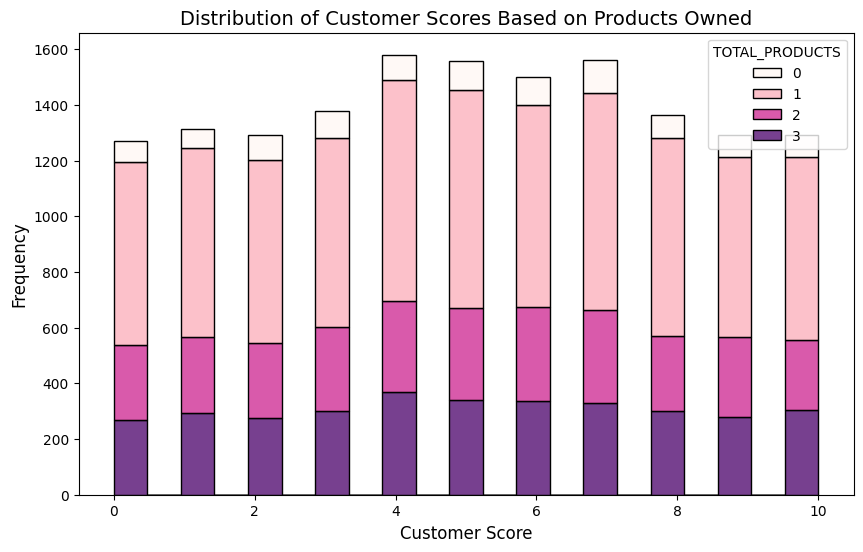

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(data=cr, x='CUSTOMER_SCORE', hue='TOTAL_PRODUCTS', multiple="stack", palette='RdPu')

plt.title("Distribution of Customer Scores Based on Products Owned", fontsize=14)
plt.xlabel("Customer Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


### number of submissions on various dates

In [53]:

# Count the number of submissions per date
submission_c = cr['TIMESTAMP'].value_counts().sort_index()
# Count the number of submissions per date

# Day with the most surveys submitted
most_submitted_day = submission_c.idxmax()
most_submitted_count = submission_c.max()

# Day with the least surveys submitted
least_submitted_day = submission_c.idxmin()
least_submitted_count = submission_c.min()

# Output the results
print(f"The most surveys: {most_submitted_day}, {most_submitted_count}")
print(f"The least surveys: {least_submitted_day}, {least_submitted_count}")





The most surveys: 2023-01-27, 1036
The least surveys: 2023-01-08, 152


## plot

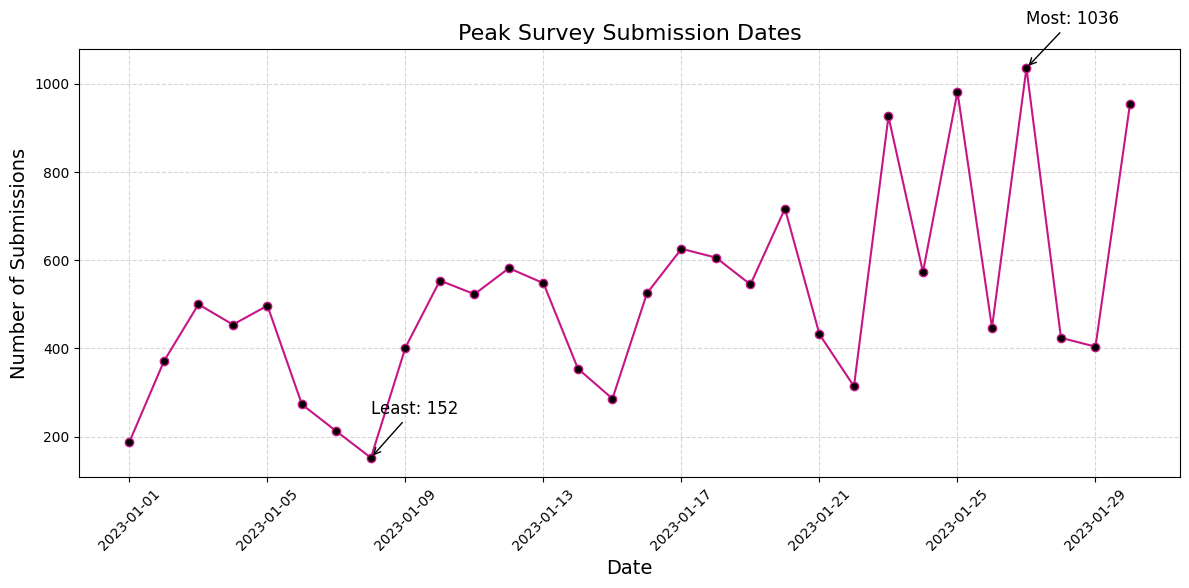

In [54]:
#  peak submission dates
plt.figure(figsize=(12, 6))
plt.plot(submission_c.index, submission_c.values, marker='o', linestyle='-', color='mediumvioletred', markerfacecolor='black')
plt.title("Peak Survey Submission Dates", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Submissions", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.annotate(f"Most: {most_submitted_count}", #KI assitance
             xy=(most_submitted_day, most_submitted_count), 
             xytext=(most_submitted_day, most_submitted_count + 100),  
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12, color='black')


plt.annotate(f"Least: {least_submitted_count}", 
             xy=(least_submitted_day, least_submitted_count), 
             xytext=(least_submitted_day, least_submitted_count + 100), 
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12, color='black')

plt.tight_layout()
plt.show()


## anova test among survey types

In [55]:
from scipy.stats import f_oneway

# Group 
survey_groups = [cr[cr['SURVEY_TYPE'] == survey_type]['CUSTOMER_SCORE'].dropna() for survey_type in cr['SURVEY_TYPE'].unique()]

# Perform ANOVA test
anova_result = f_oneway(*survey_groups)

print("ANOVA Test Results for Survey Type:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("There is significant difference in CUSTOMER_SCORE ")
else:
    print("No significant difference in CUSTOMER_SCORE")


ANOVA Test Results for Survey Type:
F-statistic: 0.2434
P-value: 0.7840
No significant difference in CUSTOMER_SCORE


## histogram for CUSTOMER_SCORE

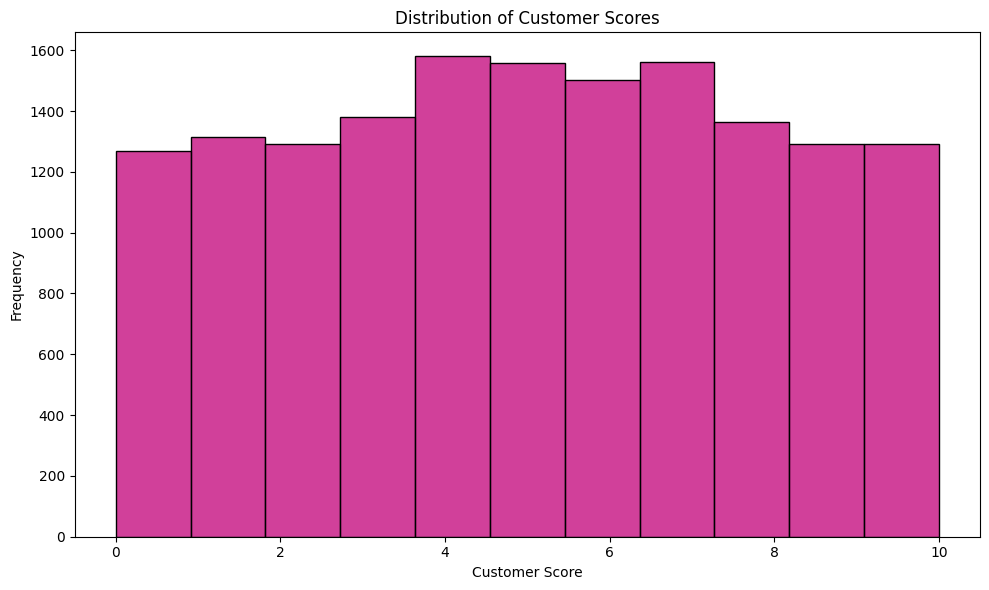

In [56]:

plt.figure(figsize=(10, 6))
sns.histplot(cr['CUSTOMER_SCORE'], bins=11, color='xkcd:magenta')
plt.title('Distribution of Customer Scores')
plt.xlabel('Customer Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### top regions

In [60]:

cr['REGION'] = cr['REGION'].str.title() #to make unified format
cr = cr.dropna()
# Check the regions after standardization
anz_regions = cr["REGION"].value_counts()
u_regions = cr["REGION"].unique()
n_regions = len(u_regions)
n_regions
top_regions = anz_regions.head(10).index

top_counts = anz_regions.loc[top_regions]
top_perc = (top_counts / anz_regions.sum()) * 100  

top_summary = pd.DataFrame({
    'Submission Count': top_counts,
    'Percentage': top_perc
})

print(top_summary)



                 Submission Count  Percentage
REGION                                       
Wien                         6346   41.189070
Graz                          723    4.692672
Innsbruck                     359    2.330110
Klagenfurt                    305    1.979620
Linz                          245    1.590186
Salzburg                      194    1.259168
Wiener Neustadt               139    0.902187
Dornbirn                      104    0.675018
Villach                       100    0.649056
Wels                           80    0.519244


# anova test

In [61]:
from scipy.stats import f_oneway


cr_tregions = cr[cr['REGION'].isin(top_regions)]
#  we group CUSTOMER_SCORE data by the top regions selected 
region_gr = [cr_tregions[cr_tregions["REGION"] == region]["CUSTOMER_SCORE"] for region in top_regions]

# as a next step we are ready to perform the anova test
anova_regions = f_oneway(*region_gr)

print("ANOVA in Top Regions:")
print(f"F-statistic: {anova_regions.statistic:.4f}")
print(f"P-value: {anova_regions.pvalue:.4f}")

#interpretation 
if anova_regions.pvalue < 0.05:
    print("Significant difference in CUSTOMER_SCORE in top regions.")
else:
    print("No significant difference in CUSTOMER_SCORE in top regions.")


ANOVA in Top Regions:
F-statistic: 0.9685
P-value: 0.4640
No significant difference in CUSTOMER_SCORE in top regions.


## box plot

/var/folders/hz/1yspsh5535q6skwbqf7lymqw0000gn/T/ipykernel_33960/731752678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


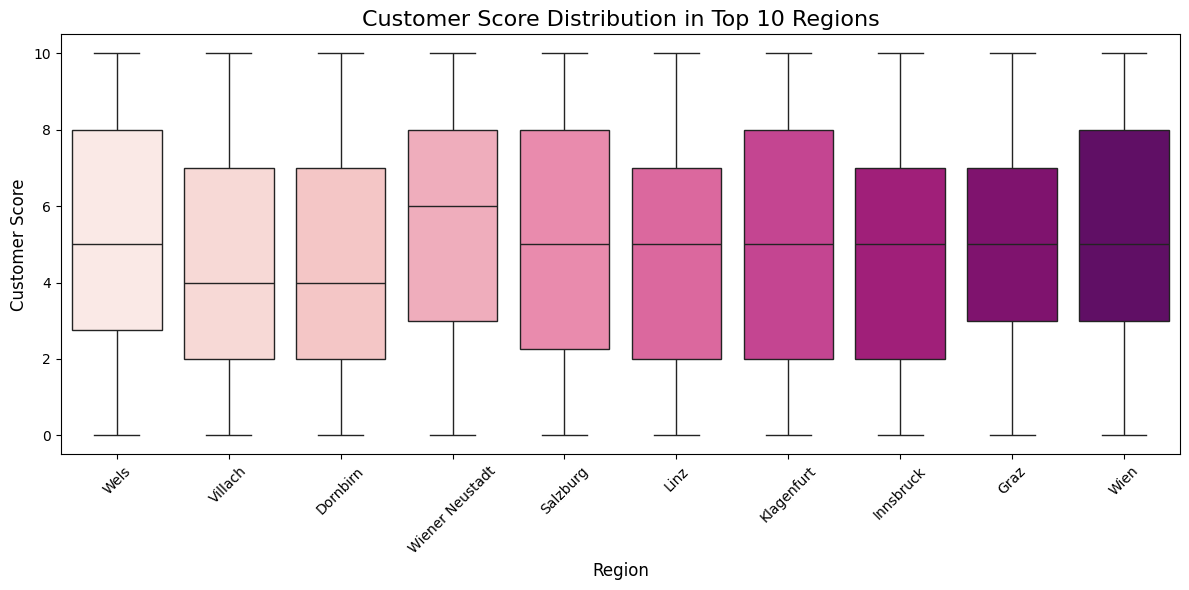

In [62]:
## As a next step, we are plotting the results of a test
# added later # ordered the regions by size 
region_ordered = cr_tregions["REGION"].value_counts(ascending = True).index

# box plot with the ordered regions
plt.figure(figsize = (12, 6))
sns.boxplot(
    data = cr_tregions, 
    x = "REGION", 
    y = "CUSTOMER_SCORE", 
    order = region_ordered,  
    palette = "RdPu"
)
plt.title("Customer Score Distribution in Top 10 Regions", fontsize = 16)
plt.xlabel("Region", fontsize = 12)
plt.ylabel("Customer Score", fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


## survey types by region

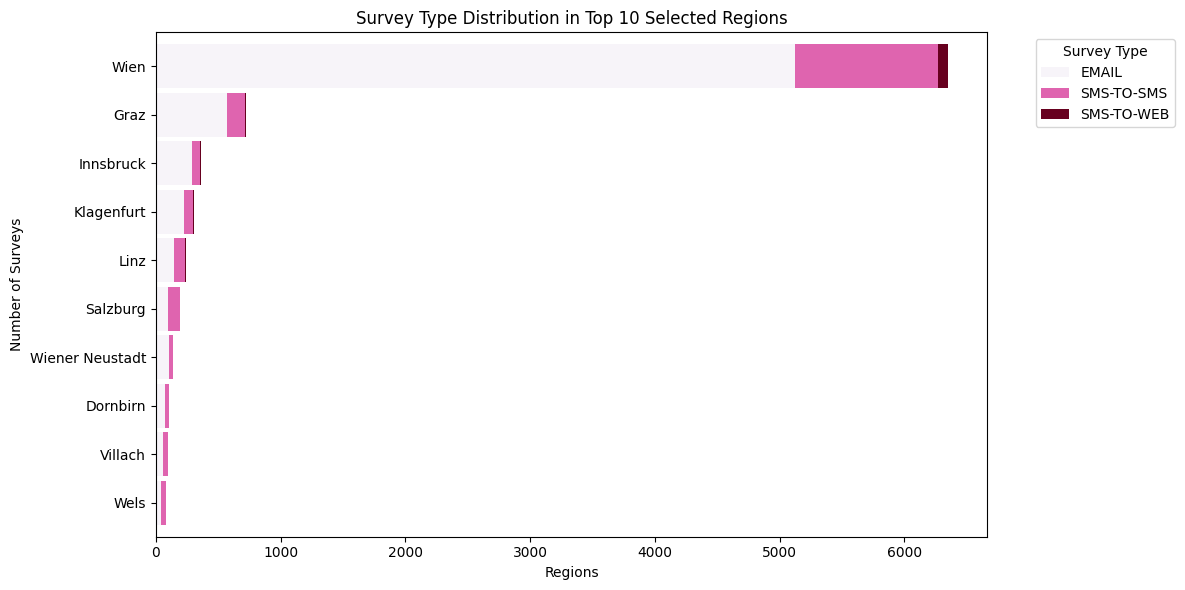

In [63]:

#analyze survey types by region
survey_dist = (
    cr_tregions.groupby(["REGION", "SURVEY_TYPE"])
    .size()  # Count occurrences
    .unstack(fill_value = 0)  # we create a matrix
)
# sort by total surveys submitted
survey_dist["TOTAL"] = survey_dist.sum(axis = 1)
survey_dist = survey_dist.sort_values("TOTAL", ascending = True).drop(columns = "TOTAL")


#plot bar chart
survey_dist.plot(
    kind = 'barh',
    stacked = True,
    figsize = (12, 6),
    colormap = "PuRd",
    width = 0.9,
    title = "Survey Type Distribution in Top 10 Selected Regions"
)

plt.ylabel("Number of Surveys")
plt.xlabel("Regions")
plt.legend(title = "Survey Type", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()
